In [1]:
import os 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from PIL import Image 
from sklearn.metrics import accuracy_score 
from tensorflow.keras.utils import to_categorical 
from keras.models import Sequential, Model 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D 
from keras.optimizers import Adam, RMSprop 
from keras.callbacks import ReduceLROnPlateau 

In [2]:
folder_benign_train = 'data/train/benign' 
folder_malignant_train = 'data/train/malignant' 

folder_benign_test = 'data/test/benign' 
folder_malignant_test = 'data/test/malignant'

read = lambda imname: np.asarray(Image.open(imname).convert("RGB")) 

# Load in training pictures 
ims_benign = [read(os.path.join(folder_benign_train, filename)) for filename in os.listdir(folder_benign_train)]
X_benign = np.array(ims_benign, dtype='uint8') 
ims_malignant = [read(os.path.join(folder_malignant_train, filename)) for filename in os.listdir(folder_malignant_train)]
X_malignant = np.array(ims_malignant, dtype='uint8')

# Load in testing pictures
ims_benign = [read(os.path.join(folder_benign_test, filename)) for filename in os.listdir(folder_benign_test)]
X_benign_test = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_test, filename)) for filename in os.listdir(folder_malignant_test)]
X_malignant_test = np.array(ims_malignant, dtype='uint8')


y_benign = np.zeros(X_benign.shape[0]) 
y_malignant = np.ones(X_malignant.shape[0])   

y_benign_test = np.zeros(X_benign_test.shape[0]) 
y_malignant_test = np.ones(X_malignant_test.shape[0]) 



X_train = np.concatenate((X_benign, X_malignant), axis = 0) 
y_train = np.concatenate((y_benign, y_malignant), axis = 0) 

X_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0) 
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0) 


s = np.arange(X_train.shape[0]) 
np.random.shuffle(s) 
X_train = X_train[s] 
y_train = y_train[s] 

s = np.arange(X_test.shape[0]) 
np.random.shuffle(s) 
X_test = X_test[s] 
y_test = y_test[s] 

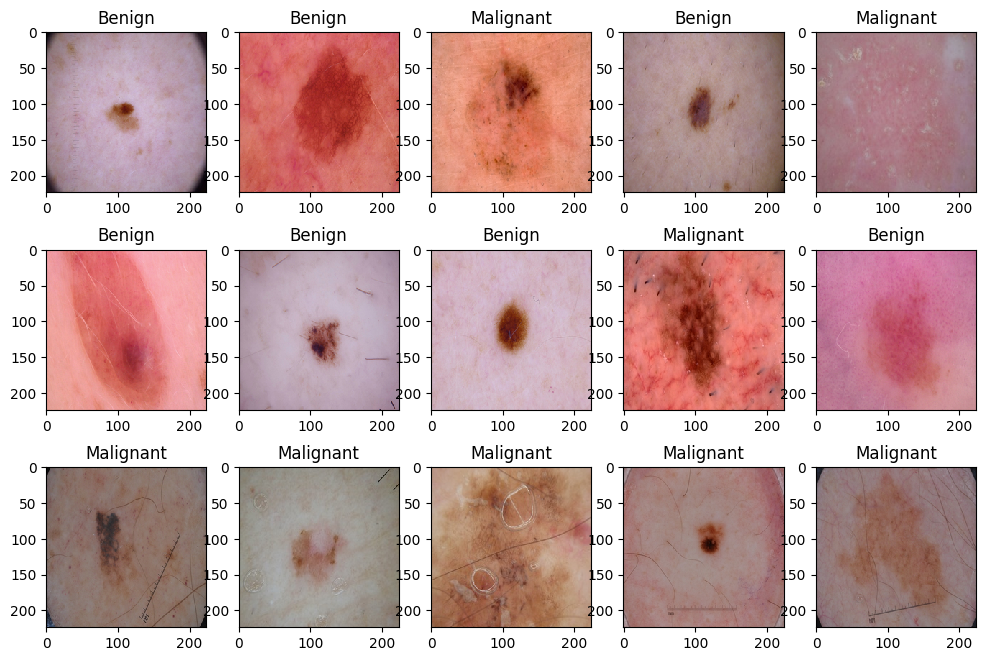

In [3]:
w=40 
h=30 
fig=plt.figure(figsize=(12, 8)) #
columns = 5 
rows = 3 

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign') 
    else: 
        ax.title.set_text('Malignant') 
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

In [4]:
y_train = to_categorical(y_train, num_classes= 2)
y_test = to_categorical(y_test, num_classes= 2) 

In [5]:

X_train = X_train/255. 
X_test = X_test/255. 

In [6]:
def build(input_shape= (224,224,3), learning_rate = 1e-3, num_classes= 2, 
        init= 'normal', activ= 'relu', optim= 'adam'): 
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',input_shape=input_shape, 
                    activation= activ, kernel_initializer='glorot_uniform')) 
    model.add(MaxPool2D(pool_size = (2, 2))) 
    model.add(Dropout(0.25)) 

    model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same', 
                    activation =activ, kernel_initializer = 'glorot_uniform')) 
    model.add(MaxPool2D(pool_size = (2, 2))) 
    model.add(Dropout(0.25)) 

    model.add(Flatten()) 
    model.add(Dense(128, activation='relu', kernel_initializer=init)) 
    model.add(Dense(num_classes, activation='softmax'))
    model.summary() 

    if optim == 'rmsprop': 
        optimizer = RMSprop(learning_rate=learning_rate) 

    else: #değilse
        optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer = optimizer ,loss = "binary_crossentropy", metrics=["accuracy"]) 
    return model 


learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=1e-7) 

In [7]:

input_shape = (224,224,3) 
lr = 1e-5 
init = 'normal' 
activ = 'relu' 
optim = 'adam' 
epochs = 50 
batch_size = 64 

model = build(learning_rate=lr, init= init, activ= activ, optim=optim, input_shape= input_shape) #modeli oluşturuyor


history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs= epochs, batch_size= batch_size, verbose=0, 
                    callbacks=[learning_rate_reduction]
                    ) 


c:\Users\Tunca\anaconda3\envs\bionlukk\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,729,218 (98.15 MB)

 Trainable params: 25,729,218 (98.15 MB)

 Non-trainable params: 0 (0.00 B)

c:\Users\Tunca\anaconda3\envs\bionlukk\lib\site-packages\keras\src\callbacks\callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


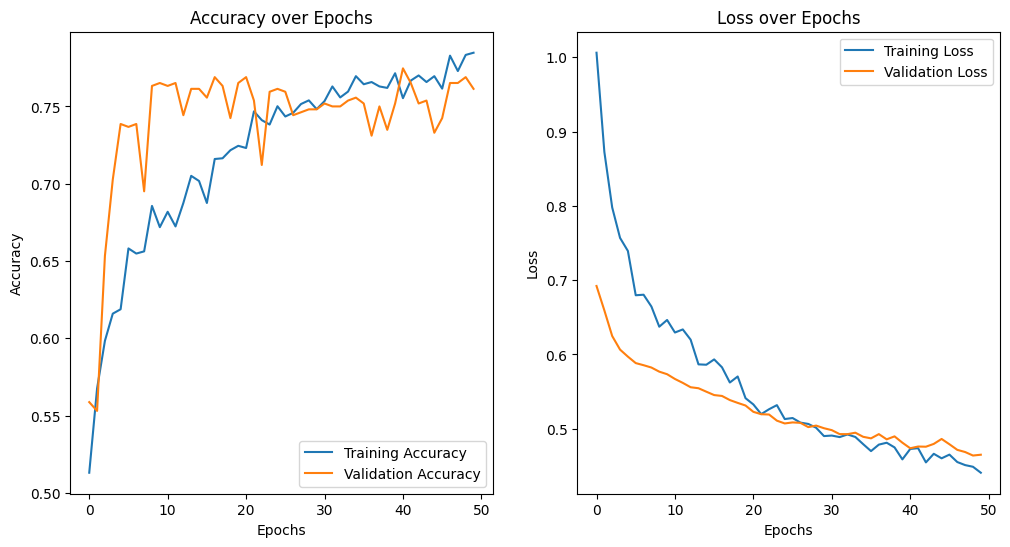

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step


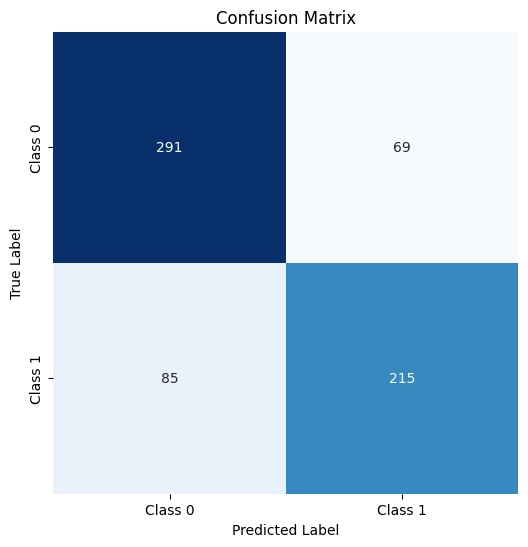

F1 Score: 0.7363013698630136
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.77      0.81      0.79       360
     Class 1       0.76      0.72      0.74       300

    accuracy                           0.77       660
   macro avg       0.77      0.76      0.76       660
weighted avg       0.77      0.77      0.77       660



In [10]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report

# Eğitim ve doğrulama kaybı ve doğruluk grafikleri
plt.figure(figsize=(12, 6))
# Doğruluk
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

# Kayıp
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.show()

# Confusion Matrix için tahminler
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# F1 Skor hesaplama
f1 = f1_score(y_true, y_pred_classes, average='binary')
print("F1 Score:", f1)

# Classification Report
report = classification_report(y_true, y_pred_classes, target_names=['Class 0', 'Class 1'])
print("Classification Report:")
print(report)